## Prinicipal Component Analysis (PCA)
---

### Einführung

Im Vergleich zu den bisher vorgstellten Supervised Machine Learning Verfahren stellt PCA ein Supervised Machine Learning Verfahren dar. Das Ziel der PCA besteht darin, die Dimensionalität von Daten (=die Anzahl der Features) zu reduzieren, indem die Daten auf ein neues orthogonales Koordinatensystem (mit geringerer Dimension) projeziertn werden, so dass  
- die Korrelation der Features untereinander verschwindet (die Daten also unkorreliert sind) und
- die Varianz der Daten bewahrt wird.

Wir definieren wie üblich die Datenmatrix $\mathbf{X}$ als
$$
\mathbf{X} = \begin{pmatrix}\left(\vec{x}^{(1)}\right)^T \\ \vdots \\ \left(\vec{x}^{(m)}\right)^T \end{pmatrix}  \in\mathbb{R}^{m\times n}
$$
Wir betrachten als Beispiel folgende Daten mit $m=100$ Training Examples und $n=2$ Features.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

m=100

x = np.reshape(np.random.rand(m) + 0.3,(m,1))
y = x + 0.1*np.random.randn(m,1)
X = np.hstack((x,y))

plt.scatter(X[:,0],X[:,1])
plt.axis([-0.5,1.5,-1.5,1.5])
plt.grid()

Wir bestimmen den Mittelwert für jedes Feature über alle Training Examples
$$
\vec{\mu} = \frac{1}{m}\sum_{k=1}^m \vec{x}^{(i)}
$$
und ziehen diesen dann von jedem Training Example ab, d.h.
$$
\vec{x}^{(i)} \rightarrow \vec{x}^{(i)}-\vec{\mu}
$$

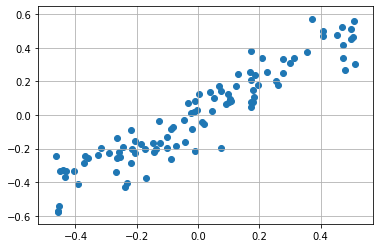

In [2]:
X = X - np.mean(X,axis=0,keepdims=True)

plt.scatter(X[:,0],X[:,1])
plt.grid()

Wir suchen nun neue orthogonale Achsen, bezüglich derer die Daten
- ihre maximale Varianz bewahren
- unkorreliert sind.

Wie in der Vorlesung gezeigt, kann man diese Achsen (die sogenannten Principal Components) als Eigenvektoren der Kovarianzmatrix $\mathbf{C}$ der Datenmatrix $\mathbf{X}$ bestimmen.

Mithilfe der um den Mittelwert bereinigten Datenmatrix lässt sich die Kovarianzmatrix wie folgt berechnen
$$
\mathbf{C} = \mathbf{X}^T\mathbf{X} \in\mathbb{R}^{n\times n}
$$

C=[[7.56624465 7.21083988]
 [7.21083988 7.80239081]]

W=[[ 0.70129445 -0.71287172]
 [ 0.71287172  0.70129445]]

L=[14.89612423  0.47251123]


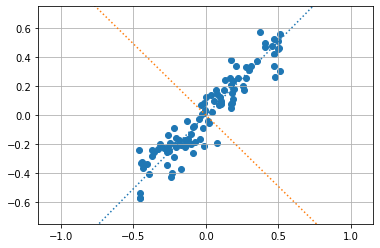

In [3]:
import math

C = np.dot(X.T,X)
print('C={}'.format(C))
print('')

# Bestimmung der Prinicpal Components ...
L,W = np.linalg.eigh(C)
# ... in absteigende Reihenfolge sortieren
idx = L.argsort()[::-1]   
L = L[idx]
W = W[:,idx]
print('W={}'.format(W))
print('')
print('L={}'.format(L))

# Plotten der Daten mit PCA
t = np.linspace(-2,2,1000)
plt.scatter(X[:,0],X[:,1])
plt.plot(t*W[0,0],t*W[1,0],':')
plt.plot(t*W[0,1],t*W[1,1],':')
plt.axes().set_aspect('equal', 'datalim')
plt.axis([-0.75,0.75,-0.75,0.75])
plt.grid()

Die Matrix $\mathbf{W}$ enthält die Principal Components $\vec{c}_1,\vec{c}_2,\ldots$.

Wir können die Dimension der Daten nun reduzieren, indem wir die Daten auf einen d-dimensionalen Unterraum projezieren
$$
\mathbf{X}_d = \mathbf{X}\cdot\mathbf{W}_d \in\mathbb{R}^{m\times d}
$$
wobei $\mathbf{W}_d$ die Principal Components  $\vec{c}_1,\vec{c}_2,\ldots \vec{c}_d$ mit den (absteigend) höchsten Eigenwerten enthält.


In [ ]:
# Project Data on Principal Components (Wir nutzen d=1)
X_d = np.dot(X,W[:,0]).reshape(m,1)
#X_d = np.dot(X,W)

plt.scatter(X_d[:,0].reshape(m,1),np.zeros((m,1)))
#plt.scatter(np.zeros((m,1)),X_d[:,1].reshape((m,1)))
plt.axis([-1,1,-1,1])
plt.grid()

Die Rücktransformation geschieht mittels
$$
\mathbf{X}_{bt} = \mathbf{X}_d\cdot\mathbf{W}_d^T \in \mathbb{R}^{m\times n}
$$

In [ ]:
# Im neuen Koordinatensystem ist die Kovarianzmatrix diagonal
C_d=np.cov(X_d.T)
print(C_d)
C_d[0,0]/np.sum(np.diag(C_d))

### PCA mittels  Scikit-learn durchführen

Im folgenden Python-Code wird das Verfahren der PCA mittels Scikit-learn vorgstellt:

- Durchführen der Hintransformation

[0.96925484 0.03074516]
0.9999999999999999


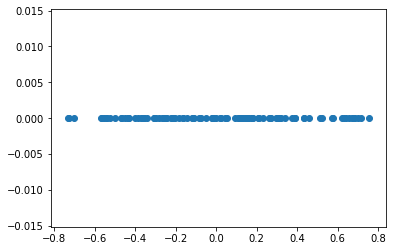

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#
#d = 2
#pca = PCA(n_components=d)
# oder
pca = PCA(n_components=0.98)

# Entweder ...
X_d = pca.fit_transform(X)
# ... oder
# pca.fit(X)
# X_d = pca.transform(X)

plt.scatter(X_d[:,0],0*X_d[:,0])

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

In [ ]:
0.46459361/(17.07496408 +0.46459361)

- Durchführen der Rücktransformation

In [ ]:
X_bp = pca.inverse_transform(X_d)
plt.scatter(X_bp[:,0],X_bp[:,1])
plt.grid()

- Ausgabe der Principal Components

In [5]:
pca.components_

array([[ 0.70129445,  0.71287172],
       [ 0.71287172, -0.70129445]])

In [ ]:
=[[ 0.70129445 -0.71287172]
 [ 0.71287172  0.70129445]]